In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import *

In [16]:
def plot_scores(df_all_scores, UNCERTAINTY, METRIC, log_x=True, log_y=False):
    
    uncertainties = {
    "sd": np.std,
    "se": lambda x: np.std(x) / np.sqrt(len(x)),
    }

    # gather the scores, and apply the uncertainty
    df_scores = df_all_scores.groupby(["method", "n_train"]).agg({METRIC: [np.mean, uncertainties[UNCERTAINTY], len],}).reset_index()
    df_scores.columns = ["method", "n_train", "mean", "uncertainty", "n"]
    print("Number of simulations: ", int(df_scores["n"].mean()))


    # plot with uncertainty, x-axis is n_train, y-axis is the score
    list_methods = df_scores["method"].unique()

    plt.figure(figsize=(10, 6))
    for met in list_methods:
        df_met = df_scores[df_scores["method"] == met]
        plt.errorbar(df_met["n_train"], df_met["mean"], yerr=df_met["uncertainty"], label=met, marker="o")

    plt.axhline(0, color="black", linestyle="--")

    plt.xlabel("n_train")

    if log_x:
        plt.xscale("log")
    if log_y:
        plt.yscale("log")

    plt.legend()
    plt.ylabel(METRIC + " (" + UNCERTAINTY + ")")
    plt.title(f"Scores for different methods")
    plt.grid()
    plt.show()

In [24]:
specific_pattern = None
diff_bayes = True


exclude_methods = [
    "LOG.0",
    "LOG.10",
    "LOG.3",
]

choice_set_up = {
}


In [ ]:
df_all_scores = compute_all_scores(choice_set_up, specific_pattern, diff_bayes, exclude_methods=exclude_methods)

In [41]:
def plot_scores_imp(ax, df_all_scores, UNCERTAINTY, METRIC, log_x=True, log_y=False, exclude_methods=None):
    """
    Plots scores for different methods with uncertainty on a provided axis (ax).

    Args:
        ax: Matplotlib axis object for the subplot.
        df_all_scores: DataFrame containing all scores.
        UNCERTAINTY: Uncertainty metric (e.g., "sd", "se").
        METRIC: Metric to plot (e.g., "mae_score").
        log_x: Whether to use log scale on x-axis.
        log_y: Whether to use log scale on y-axis.

    Returns:
        The Matplotlib axis object (ax) after plotting the scores.
    """

    if exclude_methods is None:
        exclude_methods = []

    color_palette = plt.cm.tab10.colors

    methods_config = {
        "LOG.0": {"label": "0.IMP", "color": color_palette[0], "linestyle": "-", "marker": "o"},
        "LOG.05": {"label": "05.IMP", "color": color_palette[1], "linestyle": "-", "marker": "o"},
        "LOG.05.M": {"label": "05.IMP.M", "color": color_palette[1], "linestyle": ":", "marker": "x"},
        "LOG.Mean": {"label": "Mean.IMP", "color": color_palette[2], "linestyle": "-", "marker": "o"},
        "LOG.Mean.M": {"label": "Mean.IMP.M", "color": color_palette[2], "linestyle": ":", "marker": "x"},
        "LOG.ICE": {"label": "ICE.IMP", "color": color_palette[3], "linestyle": "-", "marker": "o"},
        "LOG.ICE.M": {"label": "ICE.IMP.M", "color": color_palette[3], "linestyle": ":", "marker": "x"},
        "LOG.ICEY": {"label": "ICEY.IMP", "color": color_palette[4], "linestyle": "-", "marker": "o"},
        "LOG.ICEY.M": {"label": "ICEY.IMP.M", "color": color_palette[4], "linestyle": ":", "marker": "x"},
        "LOG.PbP": {"label": "PbP", "color": color_palette[5], "linestyle": "-", "marker": "o"},
    }


    metrics_label = {
        "classification_score": "Misclassification rate",
        "brier_score": "Brier score",
        "mae_score": "Mean absolute error",
    }

    uncertainties_label = {
        "se": "std. err."
    }

    uncertainties = {
        "sd": np.std,
        "se": lambda x: np.std(x) / np.sqrt(len(x)),
    }

    # Gather the scores and apply the uncertainty
    df_scores = df_all_scores.groupby(["method", "n_train"]).agg({
        METRIC: ["mean", uncertainties[UNCERTAINTY], len],
    }).reset_index()
    df_scores.columns = ["method", "n_train", "mean", "uncertainty", "n"]

    # Plot with uncertainty
    list_methods = df_scores["method"].unique()
    for i, met in enumerate(list_methods):
        if met in exclude_methods:
            continue
        df_met = df_scores[df_scores["method"] == met]
        ax.plot(
            df_met["n_train"],
            df_met["mean"],
            label=methods_config[met]["label"],
            marker=methods_config[met]["marker"],
            color=methods_config[met]["color"],
            linestyle=methods_config[met]["linestyle"],
        )
        ax.fill_between(
            df_met["n_train"],
            df_met["mean"] - df_met["uncertainty"],
            df_met["mean"] + df_met["uncertainty"],
            alpha=0.2,
            color=methods_config[met]["color"],
        )

    # Plot line at y = 0
    ax.axhline(0, color="black", linestyle="--")

    # Set labels and title (optional, can be done outside the function)
    ax.set_xlabel("Training samples")
    if log_x:
        ax.set_xscale("log")
    if log_y:
        ax.set_yscale("log")

    # Legend, title, and grid can be done outside for subplot customization
    ax.set_ylabel(metrics_label[METRIC] + " (" + uncertainties_label[UNCERTAINTY] + ")")

    return ax

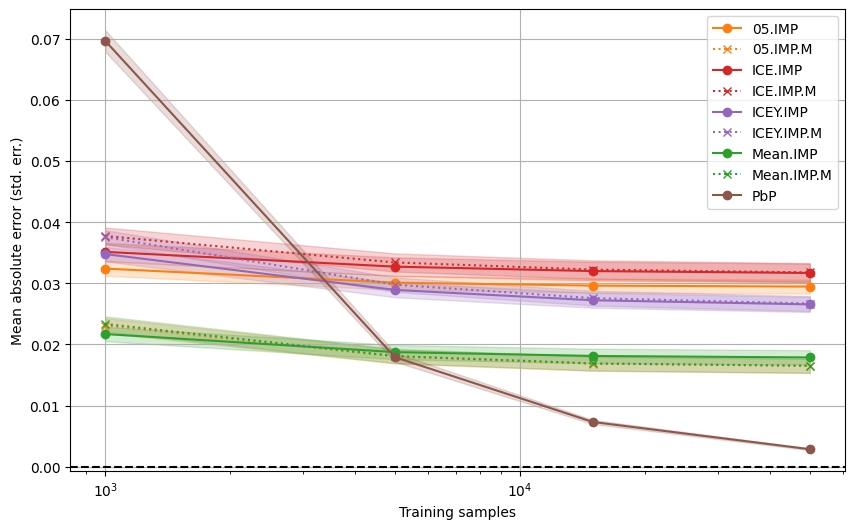

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_scores_imp(ax, df_all_scores, "se", "mae_score", log_x=True, log_y=False, exclude_methods=exclude_methods)
ax.legend()
ax.grid()
# plt.savefig("save_plots/MAE_ALL.pdf")
plt.show()

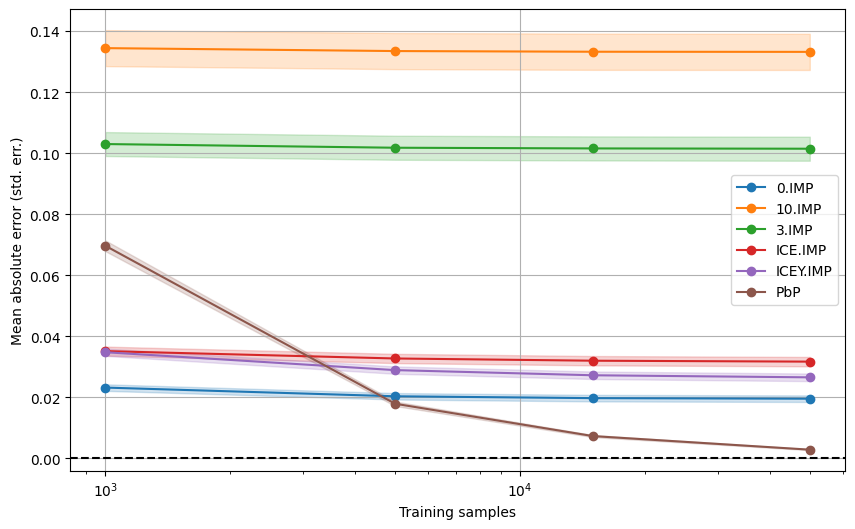

In [40]:
# save plot as pdf
fig, ax = plt.subplots(figsize=(10, 6))
plot_scores_imp(ax, df_all_scores, "se", "mae_score", log_x=True, log_y=False)
ax.legend()
ax.grid()
# plt.savefig("save_plots/MAE_ALL.pdf")